# 암호화 방식
1. VTI
 - 적용의 편의성 암호화 적용시 별도의 뷰와 트리거를 이용. 기존환경 및 어플리케이션 수정을 최소화 > Legacy System 구축에 용이
   - 장점 : 암호화 적용이 편리하다.. 
   - 단점 : 성능이 좀 낮다 추가적인 뷰와 트리거를 쓰면서..
2. DBMS_API
 - DBMS server에 agent가 설치되어있어 암호화되는 모습은 VTI와 같지만 뷰트리거는 쓰이지 않는다.
   - 장점 : 뷰트리거를 사용하지 않기에 VTI보다 좀 더 빠른성능을 보장
   - 단점 : 뷰트리거를 안쓰니 기존 응용프로그램에 대해서 암호화 적용시 암호화 테이블이 포함된 모든 쿼리에 대한 수정이 필요하게 된다. VTI보다 추가적인 작업이 필요하다.

3. API
 - AP서버나 WAS서버에 설치(DB서버 부하 없음)되는 것임. 빠른 성능, 성능을 최우선적으로 고려하는 곳에 적합. 구간 암호화가 특징
 - 중앙집중화된 DB서버가 아니기에 이중,삼중,사중화된 AP서버에서 암호화를 처리하기 때문에 부하 분산을 할 수 있는 장점.
 - 암호화 컬럼 인덱스 검색 지원이 일부만 지원된다. (일치검색가능, 범위검색불가)
 - 응용프로그램 수정여부를 반드시 확인해야함.
   - 장점 : DB서버 부하가 없고 빠른 성능.
   - 단점 : 기존 응용프로그램에 대해서암호화 테이블이 포함된 소스는 모두 수정이 필요, 암호화 적용시 추가적인 작업이 필요

4. Enegine 
 - Oracle, MySQL TD?에서 엔진내부에서 자동으로 암호화를 처리 > 암호화시장에서 가장 선호
 - DBMS engine이 알아서 암호화를 처리하기 떄문에 기존 Application 환경으로부터 완벽한 독립성을 제공하고 (수정이 없다)
 - VTI 보다 빠른 성능 보장
   - 장점 : 기존 응용프로그램에 대한 수정이 거의 필요없음. 적용이 매우 간편
   - 단점 : DB엔진에 다라 제약사항이 존재. 암호화가 불가능하게 되는 경우도 있음.

5. Kernel
 - DBMS에 DB데이터 파일들에 암호화 가상 볼륨을 생성/사용
 - 기존 application 환경에 대한 제약 및 수정이 전혀 없기 때문에 가장 간편하게 암호화 적용이 가능한 방식(큰특징)
 - DB서버에서 구동되지만 암호화 가상볼륨에 대한 성능저하가 거의 없기 떄문에 DB서버에 부하가 없다.
   - 장점 : 기존 응용프로그램에 대한 수정이 거의 필요없음. 성능저하 거의 없고 
   - 단점 : 보안도에서 좀 떨어진다. 물리적인 DB파일 전체를 암호화 하고, 실서비스 시에는 해당 DB파일들을 복호화 상태로 운영하므로써 컬럼단위 암호화보다 보안도가 떨어진다.






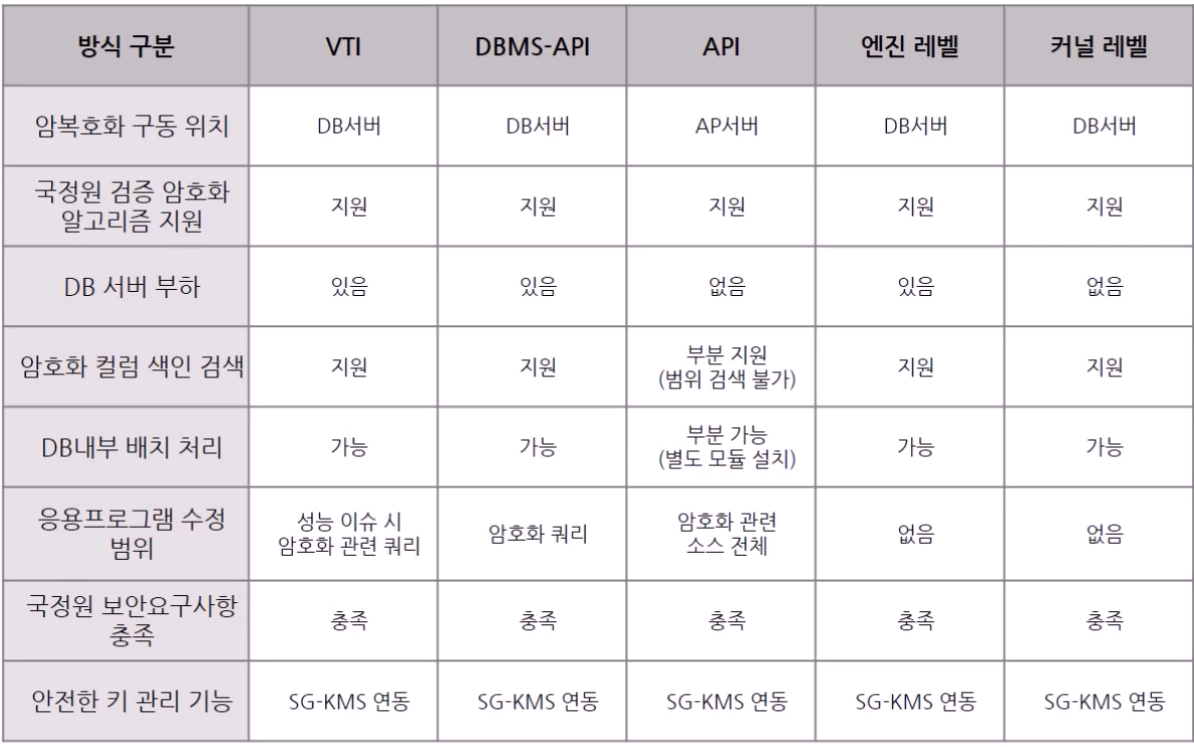

![alt text](image.png)

#### DP ( VTI / DBMS_API방식 ) : ORACLE MSSQL만 지원

- 암호화 적용시 적용 대상 테이블 외에 뷰와 트리거를 추가로 생성하여 사용 > 기존 Query의 수정을 최소화
- 암호화 기능 외에 DB사용자, IP별 접근제어 및 감사기능까지 제공
- 암호화 적용은 운영시에 암호화 대상 테이블의 구조가 변경이 될 때마다 뷰와 트리거에 대해서 운영관리자가 관리도구를 사용하여 수동으로 재생성해야하는 추가관리에 주의
- 암복호화 함수는 컬럼 타입 별로 구분되어짐.성능저하나 제약사항 발생시 다음과 같은 암복호화 함수를 사용하여 성능저하 쿼리를 수정하는 것이 필요하다.
  - enc_varchar(_pe)(_b64)
  - dec_varchar(_pe)(_b64)

- DA는 DB사용자별 접근제어 기능을 추가적으로 재공, 암호화 적용을 위한 관리도구를 제공하지 않기 때문에 암호화 적용시 수동으로 업데이트를 해야하는 번거로움이 있다.
- DA를 사용한 암호화 시에는 암호화 컬럼이 들어간 모든 쿼리를 수정하여 적용하는 것이 필요하다.
